# CSE 5243: Introduction to Data Mining

## Lab 2: Comparing Classifiers ( Individual Part )

### Allen Yang
### Xueyin Yin
### 9/30/2018

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

### 0. Get the data 

In [2]:
cols = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
        'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
        'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df = pd.read_csv('wine.data',names = cols)
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


###  1. Preliminary data analysis (15 points)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


First of all, from the information of the data set, we can note that there are no missing values in this data set.

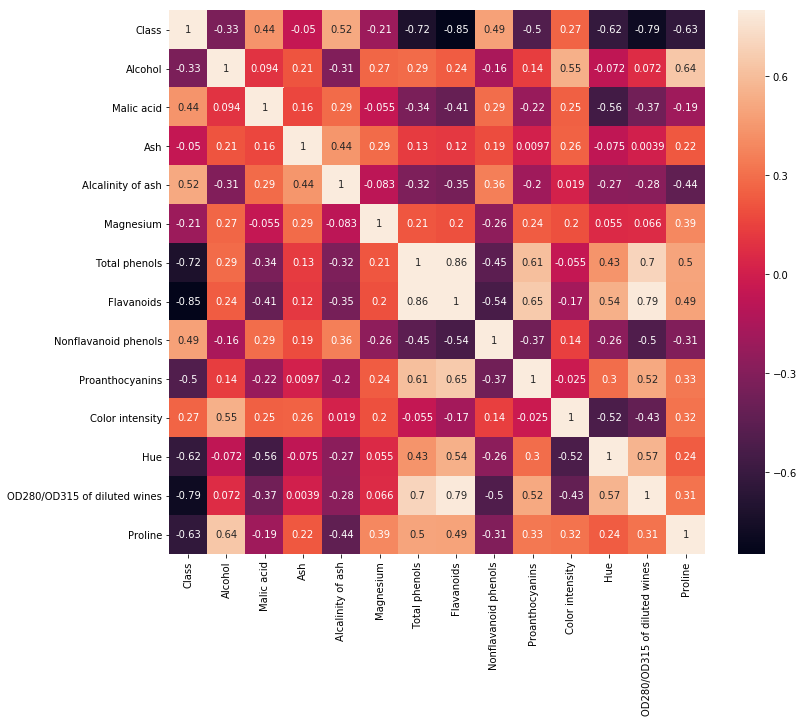

In [3]:
plt.figure(figsize=(12,10))
corr = sns.heatmap(df.corr(),vmax=0.8,annot = True)

To analysis attribute correlations in the data set. We plot a heatmap. From this map, class is closely relately to Total phenols, Flavanoids, and OD280/OD325 of diluted wines. OD280/OD325 of diluted wines has close correlation with Flavanoids. Ash even has no correlation with Proanthocyanins.

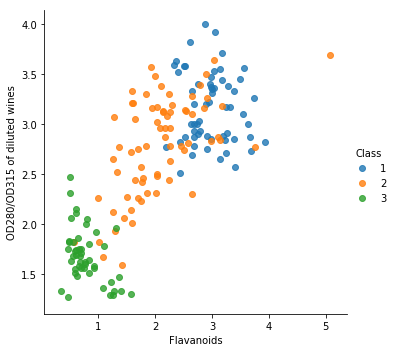

In [4]:
sns.lmplot(data=df,x='Flavanoids',y='OD280/OD315 of diluted wines',fit_reg=False,hue='Class')

We plot the figure of OD280/OD325 of diluted wines and Flavanoids. As we can observe, there is no clear border between class 2 and class 1.

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


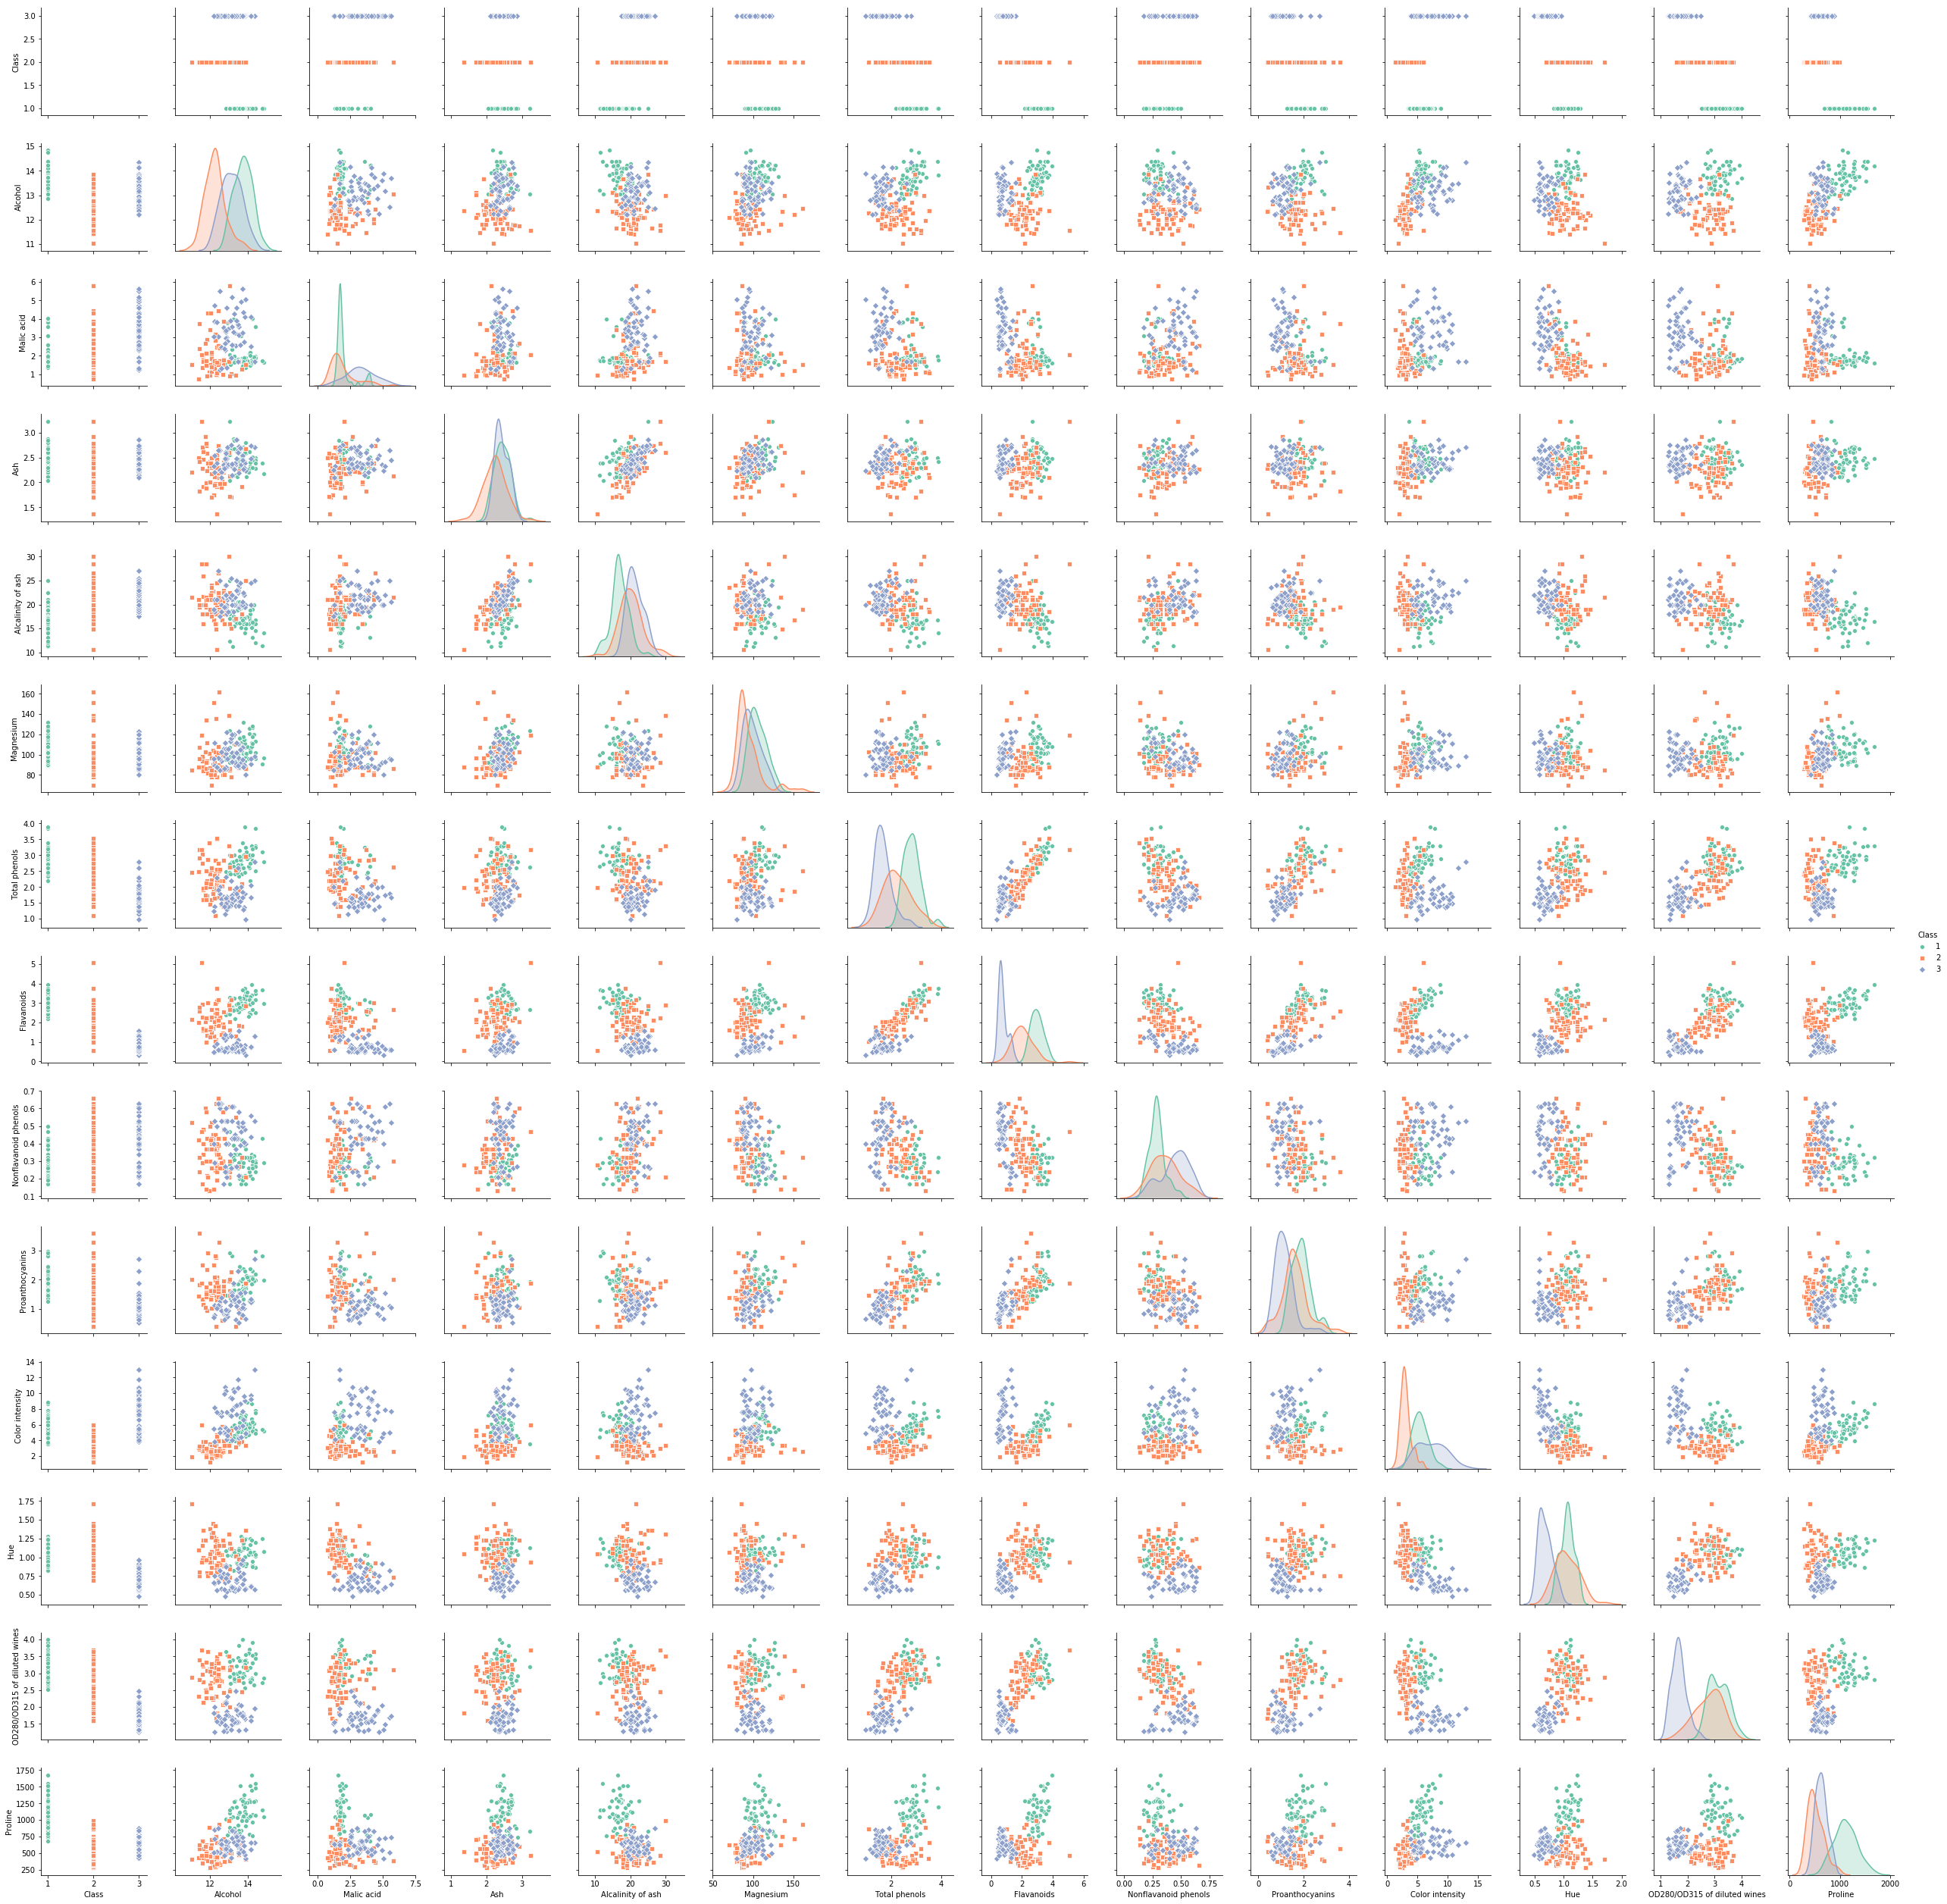

In [5]:
sns.pairplot(df, kind="scatter", hue="Class", markers=["o", "s", "D"], palette="Set2")

Here we give the pair figure of different attributes to observe outliers. The Points of class 2 varies a lot in the graph. Usually there are some outliers of class 2 to be far away from centroids.

### 2. Data preprocessing (5 points)

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.loc[:,'Alcohol':]
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
# PCA
#pca = PCA(n_components=0.92)
#pca.fit(X)
#X = pca.transform(X)
X.shape

(178, 13)

Here we do not think this data set need dimension reduction, so we do not use PCA. We use StandardScaler to standardize the attribute of this data set.

### 3. Choose an evaluation approach (15 points) 

In [7]:
y = df['Class'].values.reshape(-1,)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True)
for train_index, val_index in kf.split(X_train):
    print('train_index: %s\nval_index: %s\n'%(train_index, val_index))

train_index: [  0   1   2   3   4   6   7   8   9  10  11  13  14  15  16  17  18  19
  20  22  23  25  26  27  29  30  31  32  33  34  35  36  38  40  42  43
  44  45  46  48  49  50  52  53  54  55  56  57  58  60  61  62  63  64
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  84  85  87
  89  91  93  94  96  97  98  99 100 101 102 103 104 106 107 108 110 111
 112 113 114 115 117 118 119 121 122 123 125 128 129 130 131 132 133 135
 136 138 139 140 141]
val_index: [  5  12  21  24  28  37  39  41  47  51  59  65  66  82  83  86  88  90
  92  95 105 109 116 120 124 126 127 134 137]

train_index: [  0   1   2   4   5   6   7   9  11  12  13  14  15  17  19  20  21  22
  23  24  26  27  28  29  30  31  33  34  35  36  37  38  39  41  43  44
  45  47  48  49  50  51  52  53  55  56  57  58  59  61  62  64  65  66
  67  68  69  71  72  73  74  76  77  78  79  80  81  82  83  84  85  86
  88  90  91  92  93  95  96  97  99 101 102 104 105 107 108 109 111 112
 114 115 116 117 1

We choose 5-Fold Cross Validation as the approach for model evaluation. K-Fold Cross Validation can randomly break the dataset into k partitions. For each of k partitions, use k-1 folds for training and the remaining one for testing, which is validation. The advantage of K-Fold Cross validation is that all the examples in the dataset are eventually used for both training and testing. Finally, the true error is estimated as the average error rate. This approach can avoid the deviation from different kind of separation of training set and tesing set. 

In the following parts, 5-Fold Cross Validation is implemented in every model.

### 4. Build and evaluate six classifiers (40 points) 

#### 1. K-Nearest Neighbors

The most important tunable parameters: n_neighbors

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
best_k = 0
best_acc = 0
best_f1 = 0
acc = []
kf = KFold(n_splits=5,shuffle=True)
for k in range(1,29):
    acc_total = 0
    count = 0
    f1_total = 0
    for train_index, val_index in kf.split(X_train):
        X_subtrain, X_val = X_train[train_index],X_train[val_index]
        y_subtrain, y_val = y_train[train_index],y_train[val_index]
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_subtrain,y_subtrain)
        y_hat = knn.predict(X_val)
        f1_total += metrics.f1_score(y_val,y_hat,average='weighted')
        acc_total += knn.score(X_val,y_val)
        count += 1
    accuracy = acc_total/count
    acc.append(accuracy)
    f1_measure = f1_total/count
    if accuracy > best_acc:
        best_acc = accuracy
        best_k = k
        best_f1 = f1_measure
        best_knn = knn
print("Best K of K-Nearest Neighbors:",best_k)
print("Best accuracy of K-Nearest Neighbors:",best_acc)
print("F measure of K-Nearest Neighbors:",best_f1)

Best K of K-Nearest Neighbors: 21
Best accuracy of K-Nearest Neighbors: 0.9859605911330049
F measure of K-Nearest Neighbors: 0.9859451853020857


Text(0.5,1,'Accuracy VS K')

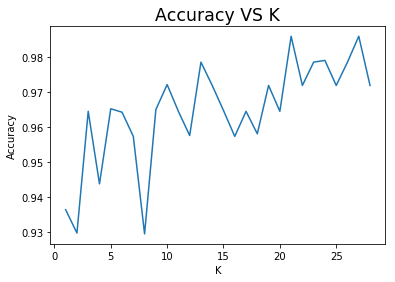

In [11]:
plt.plot(range(1,29),acc)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy VS K",fontsize = "xx-large")

#### 2. Decision Tree 

The most important tunable parameters: max_depth

In [12]:
from sklearn.tree import DecisionTreeClassifier
kf = KFold(n_splits=5,shuffle=True)
best_k = 0
best_acc = 0
best_f1 = 0
acc = []
for k in range(10,101):
    acc_total = 0
    count = 0
    f1_total = 0
    for train_index, val_index in kf.split(X_train):
        X_subtrain, X_val = X_train[train_index],X_train[val_index]
        y_subtrain, y_val = y_train[train_index],y_train[val_index]
        DT = DecisionTreeClassifier(max_depth = k)
        DT.fit(X_subtrain,y_subtrain)
        y_hat = DT.predict(X_val)        
        acc_total += DT.score(X_val,y_val)
        f1_total += metrics.f1_score(y_val,y_hat,average='weighted')
        count += 1
    accuracy = acc_total/count
    acc.append(accuracy)
    f1_measure = f1_total/count
    if accuracy > best_acc:
        best_acc = accuracy
        best_k = k
        best_f1 = f1_measure
        best_DT = DT
print("Best max_depth of Decision Tree:",best_k)
print("Best accuracy of Decision Tree:",best_acc)
print("F measure of Decision Tree:",best_f1)

Best max_depth of Decision Tree: 12
Best accuracy of Decision Tree: 0.9371921182266011
F measure of Decision Tree: 0.9380041754899846


Text(0.5,1,'Accuracy VS Max_Depth')

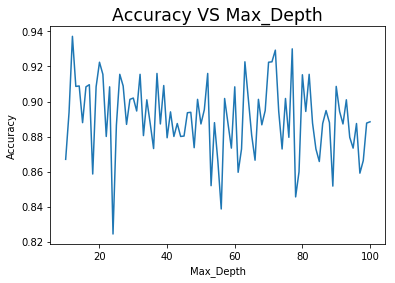

In [13]:
plt.plot(range(10,101),acc)
plt.xlabel("Max_Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy VS Max_Depth",fontsize = "xx-large")

#### 3. Naïve Bayes

The most important tunable parameters: var_smoothing

In [14]:
from sklearn.naive_bayes import GaussianNB
kf = KFold(n_splits=5,shuffle=True)
best_acc = 0
best_f1 = 0
acc = []
for k in range(1,100):
    acc_total = 0
    count = 0
    f1_total = 0
    GNB = GaussianNB()
    for train_index, val_index in kf.split(X_train):
        X_subtrain, X_val = X_train[train_index],X_train[val_index]
        y_subtrain, y_val = y_train[train_index],y_train[val_index]
        GNB.fit(X_subtrain,y_subtrain)
        y_hat = GNB.predict(X_val)
        f1_total += metrics.f1_score(y_val,y_hat,average='weighted')
        acc_total += GNB.score(X_val,y_val)
        count += 1
    accuracy = acc_total/count
    acc.append(accuracy)
    f1_measure = f1_total/count
    if accuracy > best_acc:
        best_acc = accuracy
        best_f1 = f1_measure
        best_NB = GNB
print("Best accuracy of Naïve Bayes:",best_acc)
print("F measure of Naïve Bayes:",best_f1)

Best accuracy of Naïve Bayes: 0.9862068965517242
F measure of Naïve Bayes: 0.9863079449286346


Text(0.5,1,'Accuracy VS Epoch')

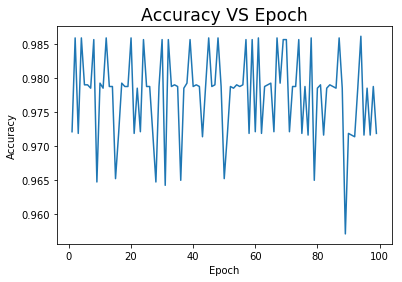

In [15]:
plt.plot(range(1,100),acc)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy VS Epoch",fontsize = "xx-large")

#### 4. Artificial Neural Network

The most important tunable parameters of ANN are the number of hidden layers and the number of neurons in every layers.

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

In [17]:
best_acc=0 
accuracy=[]
for i in range(4,100):
    clf = MLPClassifier(hidden_layer_sizes=i ,solver='lbfgs',alpha=1e-5)
    acc = 0
    count = 0
    f1=0
   
    for train_index, val_index in kf.split(X_train):
        x_subtrain=X_train[train_index]
        y_subtrain=y_train[train_index]
        x_val=X_train[val_index]
        y_val=y_train[val_index]
        clf.fit(x_subtrain,y_subtrain)
        y_predict=clf.predict(x_val)
        f1 += f1_score(y_val, y_predict, average='weighted')  
        acc += clf.score(x_val,y_val)
        count= count+1
    acc=acc/count
    accuracy.append(acc)
    if best_acc < acc:
        best_acc = acc
        best_number_nodes= i
        f1score = f1/count
        Best_ann1=clf
print('Best accuracy=',acc)
print('Best F-measure=',f1score)
print('Best number of neurons=',best_number_nodes)

Best accuracy= 0.97192118226601
Best F-measure= 0.986544061302682
Best number of neurons= 76


Text(0,0.5,'Accuracy')

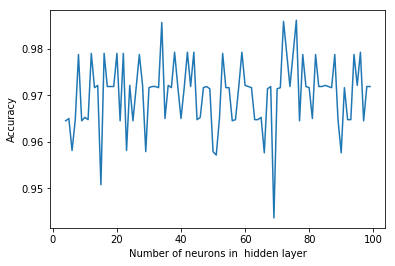

In [18]:
plt.plot(range(4,100),accuracy)
plt.xlabel('Number of neurons in  hidden layer')
plt.ylabel('Accuracy')

In [19]:
best_acc = 0 
accuracy = []
for i in range(4,60):
    clf = MLPClassifier(hidden_layer_sizes=[i,i] ,solver='lbfgs',alpha=1e-5)
    acc = 0
    count = 0
    f1=0
   
    for train_index, val_index in kf.split(X_train):
        x_subtrain=X_train[train_index]
        y_subtrain=y_train[train_index]
        x_val=X_train[val_index]
        y_val=y_train[val_index]
        clf.fit(x_subtrain,y_subtrain)
        y_predict=clf.predict(x_val)
        f1 += f1_score(y_val, y_predict, average='weighted')  
        acc += clf.score(x_val,y_val)
        count= count+1
    acc=acc/count
    accuracy.append(acc)
    if best_acc < acc:
        best_acc = acc
        best_number_nodes= i
        f1score = f1/count
        Best_ann2=clf
print('Best accuracy=',acc)
print('Best F-measure=',f1score)
print('Best number of neurons in two hidden layers =',best_number_nodes)

Best accuracy= 0.9862068965517242
Best F-measure= 0.9862068965517242
Best number of neurons in two hidden layers = 12


Text(0,0.5,'Accuracy')

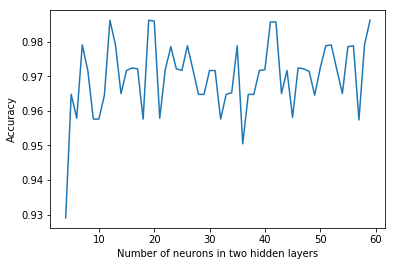

In [20]:
plt.plot(range(4,60),accuracy)
plt.xlabel('Number of neurons in two hidden layers')
plt.ylabel('Accuracy')

#### 5. Support Vector Machine

The most important tunable parameters of SVM ons is the penalty parameter C.

In [21]:
from sklearn.svm import LinearSVC
best_acc=0
accuracy=[]

for i in range(2,30):
    clf = LinearSVC(C=0.1*i, tol=0.001, verbose=False)
    acc = 0
    count = 0
    f1=0
    
    for train_index, val_index in kf.split(X_train):
        x_subtrain=X_train[train_index]
        y_subtrain=y_train[train_index]
        x_val=X_train[val_index]
        y_val=y_train[val_index]
        clf.fit(x_subtrain,y_subtrain)
        y_predict=clf.predict(x_val)
        f1 += f1_score(y_val, y_predict, average='weighted')
        acc += clf.score(x_val,y_val)
        count= count+1
    acc=acc/count
    accuracy.append(acc)
    if best_acc < acc:
        best_acc = acc
        best_penalty_factor = 0.1*i
        f1score = f1/count
        Best_svm=clf
print('Average accuracy=',acc)
print('Average F-measure=',f1score)
print('Best penalty factor=',best_penalty_factor)

Average accuracy= 0.9788177339901478
Average F-measure= 0.9858789026539363
Best penalty factor= 1.2000000000000002


Text(0,0.5,'Accuracy')

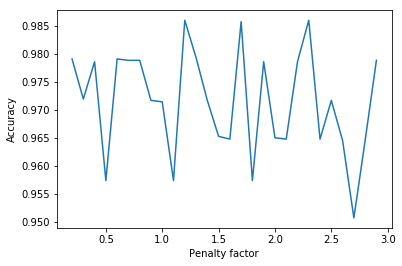

In [22]:
x = np.arange(0.2, 3.0, 0.1)
plt.plot(x,accuracy)
plt.xlabel('Penalty factor')
plt.ylabel('Accuracy')

#### 6. Ensemble Classifier (Random Forest Classifier)

The most important tunable parameters of Ensemble Classifier (Random Forest Classifier) ons is the numnber of trees in the forest.

In [23]:
from sklearn.ensemble import RandomForestClassifier
best_acc= 0
accuracy = []
for n in range(8,35):
    clf = RandomForestClassifier(n_estimators=n)
    count = 0
    f1=0.0
    acc = 0
    for train_index, val_index in kf.split(X_train):
        x_subtrain=X_train[train_index]
        y_subtrain=y_train[train_index]
        x_val=X_train[val_index]
        y_val=y_train[val_index]
        clf.fit(x_subtrain,y_subtrain)
        y_predict=clf.predict(x_val)
        f1 += f1_score(y_val, y_predict, average='weighted')
        y_predict=clf.predict(x_val)
        acc += clf.score(x_val,y_val)
        count= count+1
    acc=acc/count
    accuracy.append(acc)
    #print('average accuracy=',(acc/count))
    if best_acc < acc:
        best_acc = acc
        best_n_estimator= n
        f1score = f1/count
        Best_ec=clf
print('Best accuracy =',best_acc)
print('Best n_estimator=',best_n_estimator)
print('F-measure at this time=',f1score)

D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Best accuracy = 0.9862068965517242
Best n_estimator= 28
F-measure at this time= 0.9864948333913851


Text(0,0.5,'Accuracy')

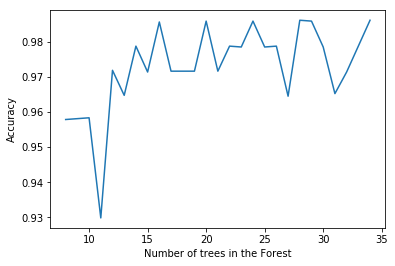

In [24]:
plt.plot(range(8,35),accuracy)
plt.xlabel('Number of trees in the Forest')
plt.ylabel('Accuracy')

Our preferred classifier is Artificial Neural Network, because the model has the highest prediction accuracy on the validation set and a high F-Measure. This classifier have lots of advantages due to its tunable parameters of number of hidden layers and the number of neurons in different hidden layers. These parameters enable ANN to have the ability to learn and model non-linear and complex relationships. Also, it can generalize after learning from the initial inputs and their relationships. However, the disadvantages of ANN are its complexity of computation and its too many tunable parameters.

### 5. Make predictions and evaluate performance on the test set (15 points) 

#### 1. K-Nearest Neighbors

In [25]:
y_hat = best_knn.predict(X_test)
print("True class:     ",y_test)
print("Predicted class:",y_hat)
knn_acc = best_knn.score(X_test,y_test)
print("Accuracy on the test set:",knn_acc)

True class:      [3 3 3 1 2 3 1 2 1 3 1 1 2 2 3 2 1 2 2 2 2 2 3 3 3 3 1 2 1 1 3 1 2 3 1 2]
Predicted class: [3 3 3 1 2 3 1 2 1 3 1 1 2 1 3 2 1 2 2 2 2 2 3 3 3 3 1 2 1 1 3 1 2 3 1 2]
Accuracy on the test set: 0.9722222222222222


#### 2. Decision Tree

In [26]:
y_hat = best_DT.predict(X_test)
print("True class:     ",y_test)
print("Predicted class:",y_hat)
knn_acc = best_DT.score(X_test,y_test)
print("Accuracy on the test set:",knn_acc)

True class:      [3 3 3 1 2 3 1 2 1 3 1 1 2 2 3 2 1 2 2 2 2 2 3 3 3 3 1 2 1 1 3 1 2 3 1 2]
Predicted class: [3 3 3 1 2 1 2 2 1 2 1 1 2 1 3 2 1 2 2 2 2 2 3 3 2 2 1 2 1 1 1 1 2 2 1 2]
Accuracy on the test set: 0.7777777777777778


#### 3. Naïve Bayes

In [27]:
y_hat = best_NB.predict(X_test)
print("True class:     ",y_test)
print("Predicted class:",y_hat)
knn_acc = best_NB.score(X_test,y_test)
print("Accuracy on the test set:",knn_acc)

True class:      [3 3 3 1 2 3 1 2 1 3 1 1 2 2 3 2 1 2 2 2 2 2 3 3 3 3 1 2 1 1 3 1 2 3 1 2]
Predicted class: [3 3 3 1 2 3 1 2 1 3 1 1 2 2 3 2 1 2 2 2 2 2 3 3 3 3 1 2 1 1 3 1 2 3 1 2]
Accuracy on the test set: 1.0


#### 4. ANN:one layer

In [28]:
y_hat=Best_ann1.predict(X_test)  
score=Best_ann1.score(X_test,y_test)
print('True class=',y_test)
print('Predicted class=',y_hat)
print('Accuracy on the test set =',score)

True class= [3 3 3 1 2 3 1 2 1 3 1 1 2 2 3 2 1 2 2 2 2 2 3 3 3 3 1 2 1 1 3 1 2 3 1 2]
Predicted class= [3 3 3 1 2 3 1 2 1 3 1 1 2 1 3 2 1 2 2 2 2 2 3 3 3 2 1 2 1 1 3 1 2 3 1 2]
Accuracy on the test set = 0.9444444444444444


#### 4. ANN:two layers

In [29]:
y_hat=Best_ann2.predict(X_test)  
score=Best_ann2.score(X_test,y_test)
print('True class=',y_test)
print('Predicted class=',y_hat)
print('Accuracy on the test set =',score)

True class= [3 3 3 1 2 3 1 2 1 3 1 1 2 2 3 2 1 2 2 2 2 2 3 3 3 3 1 2 1 1 3 1 2 3 1 2]
Predicted class= [3 3 3 1 2 3 1 2 1 3 1 1 2 2 3 2 1 2 2 2 2 2 3 3 3 3 1 2 1 1 3 1 2 3 1 2]
Accuracy on the test set = 1.0


#### 5. SVM

In [30]:
y_hat=Best_svm.predict(X_test)  
score=Best_svm.score(X_test,y_test)
print('True class=',y_test)
print('Predicted class=',y_hat)
print('Accuracy on the test set =',score)

True class= [3 3 3 1 2 3 1 2 1 3 1 1 2 2 3 2 1 2 2 2 2 2 3 3 3 3 1 2 1 1 3 1 2 3 1 2]
Predicted class= [3 3 3 1 2 3 1 2 1 3 1 1 2 2 3 2 1 2 2 2 2 2 3 3 3 2 1 2 1 1 3 1 2 3 1 2]
Accuracy on the test set = 0.9722222222222222


#### 6. Ensemble Classifier

In [31]:
y_hat=Best_ec.predict(X_test)  
score=Best_ec.score(X_test,y_test)
print('True class=',y_test)
print('Predicted class=',y_hat)
print('Accuracy on the test set =',score)

True class= [3 3 3 1 2 3 1 2 1 3 1 1 2 2 3 2 1 2 2 2 2 2 3 3 3 3 1 2 1 1 3 1 2 3 1 2]
Predicted class= [3 3 3 1 2 3 1 2 1 3 1 1 2 1 3 2 1 2 2 2 2 2 3 3 3 3 1 2 1 1 3 1 2 3 1 2]
Accuracy on the test set = 0.9722222222222222


According to the accuracies on the test set from these 6 models, we can find not all models generalize well. The decision tree model only has 77.8% accuracy on the test set while it has 93.7% accuracy on the validation set. Thus, this model doesn't generalize well. I think that it is because the features are so many that the decision tree is too deep, which leads the model to be over-fitting. In addition, maybe it is hard for the decision tree model to deal with this kind of problems. 